Import library: 

In [15]:
!git clone https://github.com/OpenNMT/OpenNMT-py.git
!cd OpenNMT-py
!pip install -e .


!pip install -r requirements.opt.txt
 
import os
import torch


Cloning into 'OpenNMT-py'...
remote: Enumerating objects: 17675, done.
remote: Total 17675 (delta 0), reused 0 (delta 0), pack-reused 17675
Receiving objects: 100% (17675/17675), 273.61 MiB | 38.32 MiB/s, done.
Resolving deltas: 100% (12753/12753), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content
ERROR: file:///content does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.opt.txt'


Read data: 

In [6]:
with open('/content/drive/MyDrive/NLP5/Main_data/train.en') as f:
    train_en = f.readlines()
with open('/content/drive/MyDrive/NLP5/Main_data/test.en') as f:
    test_en = f.readlines()
with open('/content/drive/MyDrive/NLP5/Main_data/valid.en') as f:
    valid_en = f.readlines()

with open('/content/drive/MyDrive/NLP5/Main_data/train.fa') as f:
    train_fa = f.readlines()
with open('/content/drive/MyDrive/NLP5/Main_data/test.fa') as f:
    test_fa = f.readlines()
with open('/content/drive/MyDrive/NLP5/Main_data/valid.fa') as f:
    valid_fa = f.readlines()
print("Train_English:")
print(train_en[1])
print("\n \n ")
print("Train_Farsi:")
print(train_fa[1])


Train_English:
i assembled this from a corpse , remolding its flesh and bones .


 
 
Train_Farsi:
اینها رو از یه جسد برداشتم و ظاهر پوست و استخوانش : می‌گوید رو عوض کردم .



Pre_Processing Fucntion : 

In [10]:
def space_rem(char, prev_char):
    return char in set(',.!?') and prev_char != ' '

def pre_processing(text):
    """Preprocess the English-French dataset."""
    text = text.replace('\u202f', ' ').replace('\xa0', ' ').lower()
    # Insert space between words and punctuation marks
    out = [
        ' ' + char if i > 0 and space_rem(char, text[i - 1]) else char
        for i, char in enumerate(text)]
    return ''.join(out)




In [13]:
train_en = [pre_processing(sent) for sent in train_en]
test_en = [pre_processing(sent) for sent in test_en]
valid_en = [pre_processing(sent) for sent in valid_en]
train_fa = [pre_processing(sent) for sent in train_fa]
test_fa = [pre_processing(sent) for sent in test_fa]
valid_fa = [pre_processing(sent) for sent in valid_fa]


Saving Pre-processed data: 




In [23]:
with open('/content/drive/MyDrive/NLP5/Pre_processed_data/test.en', 'w') as f:
    for line in test_en:
        f.write(line)



with open('/content/drive/MyDrive/NLP5/Pre_processed_data/test.fa', 'w') as f:
    for line in test_fa:
        f.write(line)


with open('/content/drive/MyDrive/NLP5/Pre_processed_data/train.en', 'w') as f:
    for line in train_en:
        f.write(line)


with open('/content/drive/MyDrive/NLP5/Pre_processed_data/train.fa', 'w') as f:
    for line in train_fa:
        f.write(line)


with open('/content/drive/MyDrive/NLP5/Pre_processed_data/valid.en', 'w') as f:
    for line in valid_en:
        f.write(line)


with open('/content/drive/MyDrive/NLP5/Pre_processed_data/valid.fa', 'w') as f:
    for line in valid_fa:
        f.write(line)


Apply bpe on data:" 

In [24]:
!python /content/OpenNMT-py/tools/learn_bpe.py -i /content/drive/MyDrive/NLP5/Pre_processed_data/train.en -o /content/drive/MyDrive/NLP5/BPE/src.code -s 10000

In [25]:
!python /content/OpenNMT-py/tools/learn_bpe.py -i /content/drive/MyDrive/NLP5/Pre_processed_data/train.fa -o /content/drive/MyDrive/NLP5/BPE/tgt.code -s 10000

In [26]:
!python /content/OpenNMT-py/tools/apply_bpe.py -c /content/drive/MyDrive/NLP5/BPE/src.code -i /content/drive/MyDrive/NLP5/Pre_processed_data/train.en -o /content/drive/MyDrive/NLP5/BPE/src-train-bpe.txt


!python /content/OpenNMT-py/tools/apply_bpe.py -c /content/drive/MyDrive/NLP5/BPE/src.code -i /content/drive/MyDrive/NLP5/Pre_processed_data/test.en -o /content/drive/MyDrive/NLP5/BPE/src-test-bpe.txt


!python /content/OpenNMT-py/tools/apply_bpe.py -c /content/drive/MyDrive/NLP5/BPE/src.code -i /content/drive/MyDrive/NLP5/Pre_processed_data/valid.en -o /content/drive/MyDrive/NLP5/BPE/src-valid-bpe.txt


!python /content/OpenNMT-py/tools/apply_bpe.py -c /content/drive/MyDrive/NLP5/BPE/tgt.code -i /content/drive/MyDrive/NLP5/Pre_processed_data/train.fa -o /content/drive/MyDrive/NLP5/BPE/tgt-train-bpe.txt


!python /content/OpenNMT-py/tools/apply_bpe.py -c /content/drive/MyDrive/NLP5/BPE/tgt.code -i /content/drive/MyDrive/NLP5/Pre_processed_data/test.fa -o /content/drive/MyDrive/NLP5/BPE/tgt-test-bpe.txt


!python /content/OpenNMT-py/tools/apply_bpe.py -c /content/drive/MyDrive/NLP5/BPE/tgt.code -i /content/drive/MyDrive/NLP5/Pre_processed_data/valid.fa -o /content/drive/MyDrive/NLP5/BPE/tgt-valid-bpe.txt









Building Vocab : 

In [1]:
!pip install OpenNMT-py
!pip install -r requirements.opt.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 7.3 MB/s 
     |████████████████████████████████| 16.6 MB 48.9 MB/s 
     |████████████████████████████████| 57 kB 4.1 MB/s 
     |████████████████████████████████| 73 kB 1.9 MB/s 
     |████████████████████████████████| 1.2 MB 14.1 MB/s 
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.12.0
    Uninstalling torchtext-0.12.0:
      Successfully uninstalled torchtext-0.12.0
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.opt.txt'


In [28]:
!onmt_build_vocab -config /content/drive/MyDrive/NLP5/yaml_file/en2fa.yaml -n_sample 10000

Corpus corpus_1's weight should be given. We default it to 1 for you.
[2022-06-08 12:02:43,981 INFO] Counter vocab from 10000 samples.
[2022-06-08 12:02:43,981 INFO] Build vocab on 10000 transformed examples/corpus.
[2022-06-08 12:02:43,988 INFO] corpus_1's transforms: TransformPipe()
[2022-06-08 12:02:44,189 INFO] Counters src:9456
[2022-06-08 12:02:44,190 INFO] Counters tgt:9680


In [32]:
!onmt_train -config /content/drive/MyDrive/NLP5/yaml_file/en2fa.yaml

[2022-06-08 12:25:33,181 INFO] Missing transforms field for corpus_1 data, set to default: [].
[2022-06-08 12:25:33,182 WARNING] Corpus corpus_1's weight should be given. We default it to 1 for you.
[2022-06-08 12:25:33,182 INFO] Missing transforms field for valid data, set to default: [].
[2022-06-08 12:25:33,182 INFO] Parsed 2 corpora from -data.
[2022-06-08 12:25:33,183 INFO] Get special vocabs from Transforms: {'src': set(), 'tgt': set()}.
[2022-06-08 12:25:33,183 INFO] Loading vocab from text file...
[2022-06-08 12:25:33,183 INFO] Loading src vocabulary from /content/drive/MyDrive/NLP5/Vocab/Vocab.vocab.src
[2022-06-08 12:25:33,201 INFO] Loaded src vocab has 9456 tokens.
[2022-06-08 12:25:33,205 INFO] Loading tgt vocabulary from /content/drive/MyDrive/NLP5/Vocab/Vocab.vocab.tgt
[2022-06-08 12:25:33,223 INFO] Loaded tgt vocab has 9680 tokens.
[2022-06-08 12:25:33,226 INFO] Building fields with vocab in counters...
[2022-06-08 12:25:33,238 INFO]  * tgt vocab size: 9684.
[2022-06-08 

Translation of Test data: 

In [3]:
!onmt_translate -model /content/drive/MyDrive/NLP5/Checkpoint/Checkpoint_step_10000.pt -src /content/drive/MyDrive/NLP5/Main_data/test.en -output /content/drive/MyDrive/NLP5/Test_Prediction/pred_10000.txt -gpu 0 -verbose


[2022-06-09 13:20:33,444 INFO] Translating shard 0.
/usr/local/lib/python3.7/dist-packages/onmt/translate/beam_search.py:282: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  self._batch_index = self.topk_ids // vocab_size
[2022-06-09 13:20:33,884 INFO] 
SENT 1: ['yingluck', 'shinawatra', 'has', 'to', 'be', 'proclaimed', 'by', 'the', 'nation', "'s", 'king', 'before', 'she', 'can', 'officially', 'take', 'office', '.']
PRED 1: برای مشورت به دفتر مطبوعاتی دولت پیش خواهد آورد .
PRED SCORE: -11.3405

[2022-06-09 13:20:33,884 INFO] 
SENT 2: ['if', 'king', 'bhumibol', 'adulyadej', 'proclaims', 'her', ',', 'she', 'will', 'be', 'the', '28th', 'prime', 'minister', 'in', 't

In [4]:
!wget https://raw.githubusercontent.com/moses-smt/mosesdecoder/master/scripts/generic/multi-bleu.perl

--2022-06-09 13:20:40--  https://raw.githubusercontent.com/moses-smt/mosesdecoder/master/scripts/generic/multi-bleu.perl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5234 (5.1K) [text/plain]
Saving to: ‘multi-bleu.perl’

multi-bleu.perl     100%[===================>]   5.11K  --.-KB/s    in 0s      

2022-06-09 13:20:40 (70.1 MB/s) - ‘multi-bleu.perl’ saved [5234/5234]



In [52]:
!perl multi-bleu.perl /content/drive/MyDrive/NLP5/Main_data/test.fa < /content/drive/MyDrive/NLP5/Test_Prediction/pred_10000.txt

BLEU = 2.84, 35.3/7.2/1.9/0.5 (BP=0.735, ratio=0.765, hyp_len=8705, ref_len=11385)
It is not advisable to publish scores from multi-bleu.perl.  The scores depend on your tokenizer, which is unlikely to be reproducible from your paper or consistent across research groups.  Instead you should detokenize then use mteval-v14.pl, which has a standard tokenization.  Scores from multi-bleu.perl can still be used for internal purposes when you have a consistent tokenizer.


WER on Test data :

In [60]:
# !pip install jiwer
from jiwer import wer



with open('/content/drive/MyDrive/NLP5/Main_data/test.fa') as f:
    ground_truth = f.readlines()


with open('/content/drive/MyDrive/NLP5/Test_Prediction/pred_10000.txt') as f:
    hypothesis = f.readlines()
wer_ = wer(ground_truth, hypothesis)


print("WER Measure : ", wer_)

WER Measure :  0.8620114185331577


In [75]:
import nltk



chrf = nltk.translate.chrf_score.sentence_chrf(ground_truth, hypothesis) 
print("Chrf Measure :",chrf)



Chrf Measure : 0.5264658206039678


Validation : 

step 500:

In [39]:
!onmt_translate -model /content/drive/MyDrive/NLP5/Checkpoint/Checkpoint_step_500.pt -src /content/drive/MyDrive/NLP5/Main_data/valid.en -output /content/drive/MyDrive/NLP5/validataion_data/pred_500.txt -gpu 0 -verbose
!perl multi-bleu.perl /content/drive/MyDrive/NLP5/Main_data/valid.fa < /content/drive/MyDrive/NLP5/validataion_data/pred_500.txt




[2022-06-08 13:47:08,539 INFO] Translating shard 0.
/usr/local/lib/python3.7/dist-packages/onmt/translate/beam_search.py:282: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  self._batch_index = self.topk_ids // vocab_size
[2022-06-08 13:47:09,824 INFO] 
SENT 1: ['kepus']
PRED 1: 
PRED SCORE: -2.9876

[2022-06-08 13:47:09,824 INFO] 
SENT 2: ['this', 'is', 'what', 'people', 'thought', 'they', 'had', 'noticed', ':']
PRED 2: این به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به به .
PRED SCORE: -216.9382

[2022-06-08 13:47:09,825 INFO] 
SENT

step 1500 : 

In [40]:
!onmt_translate -model /content/drive/MyDrive/NLP5/Checkpoint/Checkpoint_step_1500.pt -src /content/drive/MyDrive/NLP5/Main_data/valid.en -output /content/drive/MyDrive/NLP5/validataion_data/pred_1500.txt -gpu 0 -verbose
!perl multi-bleu.perl /content/drive/MyDrive/NLP5/Main_data/valid.fa < /content/drive/MyDrive/NLP5/validataion_data/pred_1500.txt




[2022-06-08 13:48:15,908 INFO] Translating shard 0.
/usr/local/lib/python3.7/dist-packages/onmt/translate/beam_search.py:282: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  self._batch_index = self.topk_ids // vocab_size
[2022-06-08 13:48:16,798 INFO] 
SENT 1: ['kepus']
PRED 1: وی گفت
PRED SCORE: -8.9600

[2022-06-08 13:48:16,798 INFO] 
SENT 2: ['this', 'is', 'what', 'people', 'thought', 'they', 'had', 'noticed', ':']
PRED 2: او گفت :
PRED SCORE: -9.5650

[2022-06-08 13:48:16,799 INFO] 
SENT 3: ['more', 'unlikely', 'things', 'had', 'come', 'to', 'pass']
PRED 3: او را به این کار را به او داشت .
PRED SCORE: -26.2282

[2022-06-08 13:48:16,799 INFO] 
SENT 4: ['i', 

step 2500 : 

In [41]:
!onmt_translate -model /content/drive/MyDrive/NLP5/Checkpoint/Checkpoint_step_2500.pt -src /content/drive/MyDrive/NLP5/Main_data/valid.en -output /content/drive/MyDrive/NLP5/validataion_data/pred_2500.txt -gpu 0 -verbose
!perl multi-bleu.perl /content/drive/MyDrive/NLP5/Main_data/valid.fa < /content/drive/MyDrive/NLP5/validataion_data/pred_2500.txt




[2022-06-08 13:48:51,582 INFO] Translating shard 0.
/usr/local/lib/python3.7/dist-packages/onmt/translate/beam_search.py:282: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  self._batch_index = self.topk_ids // vocab_size
[2022-06-08 13:48:52,059 INFO] 
SENT 1: ['kepus']
PRED 1: به عنوان مثال
PRED SCORE: -12.6071

[2022-06-08 13:48:52,059 INFO] 
SENT 2: ['this', 'is', 'what', 'people', 'thought', 'they', 'had', 'noticed', ':']
PRED 2: این همه چیز را در این مورد قبول قرار می‌دهند .
PRED SCORE: -17.4009

[2022-06-08 13:48:52,060 INFO] 
SENT 3: ['more', 'unlikely', 'things', 'had', 'come', 'to', 'pass']
PRED 3: به نظر می‌رسید
PRED SCORE: -8.6833

[2022-06-08 13:48:

step 3500 : 

In [42]:
!onmt_translate -model /content/drive/MyDrive/NLP5/Checkpoint/Checkpoint_step_3500.pt -src /content/drive/MyDrive/NLP5/Main_data/valid.en -output /content/drive/MyDrive/NLP5/validataion_data/pred_3500.txt -gpu 0 -verbose
!perl multi-bleu.perl /content/drive/MyDrive/NLP5/Main_data/valid.fa < /content/drive/MyDrive/NLP5/validataion_data/pred_3500.txt




[2022-06-08 13:49:40,475 INFO] Translating shard 0.
/usr/local/lib/python3.7/dist-packages/onmt/translate/beam_search.py:282: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  self._batch_index = self.topk_ids // vocab_size
[2022-06-08 13:49:40,920 INFO] 
SENT 1: ['kepus']
PRED 1: <unk>
PRED SCORE: -0.7875

[2022-06-08 13:49:40,920 INFO] 
SENT 2: ['this', 'is', 'what', 'people', 'thought', 'they', 'had', 'noticed', ':']
PRED 2: این افکار به نظر می‌رسید :
PRED SCORE: -9.5113

[2022-06-08 13:49:40,920 INFO] 
SENT 3: ['more', 'unlikely', 'things', 'had', 'come', 'to', 'pass']
PRED 3: پس از آن که قشون
PRED SCORE: -12.0079

[2022-06-08 13:49:40,921 INFO] 
SENT 4: ['i',

step 4500 : 

In [43]:
!onmt_translate -model /content/drive/MyDrive/NLP5/Checkpoint/Checkpoint_step_4500.pt -src /content/drive/MyDrive/NLP5/Main_data/valid.en -output /content/drive/MyDrive/NLP5/validataion_data/pred_4500.txt -gpu 0 -verbose
!perl multi-bleu.perl /content/drive/MyDrive/NLP5/Main_data/valid.fa < /content/drive/MyDrive/NLP5/validataion_data/pred_4500.txt




[2022-06-08 13:50:10,197 INFO] Translating shard 0.
/usr/local/lib/python3.7/dist-packages/onmt/translate/beam_search.py:282: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  self._batch_index = self.topk_ids // vocab_size
[2022-06-08 13:50:10,639 INFO] 
SENT 1: ['kepus']
PRED 1: <unk>
PRED SCORE: -1.5705

[2022-06-08 13:50:10,640 INFO] 
SENT 2: ['this', 'is', 'what', 'people', 'thought', 'they', 'had', 'noticed', ':']
PRED 2: این موضوع از آنچه رخ داد :
PRED SCORE: -8.4191

[2022-06-08 13:50:10,640 INFO] 
SENT 3: ['more', 'unlikely', 'things', 'had', 'come', 'to', 'pass']
PRED 3: پس از آن که اتفاق می‌افتاد ,
PRED SCORE: -10.5350

[2022-06-08 13:50:10,640 INFO] 
S

step 5500 : 

In [44]:
!onmt_translate -model /content/drive/MyDrive/NLP5/Checkpoint/Checkpoint_step_5500.pt -src /content/drive/MyDrive/NLP5/Main_data/valid.en -output /content/drive/MyDrive/NLP5/validataion_data/pred_5500.txt -gpu 0 -verbose
!perl multi-bleu.perl /content/drive/MyDrive/NLP5/Main_data/valid.fa < /content/drive/MyDrive/NLP5/validataion_data/pred_5500.txt




[2022-06-08 13:50:35,204 INFO] Translating shard 0.
/usr/local/lib/python3.7/dist-packages/onmt/translate/beam_search.py:282: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  self._batch_index = self.topk_ids // vocab_size
[2022-06-08 13:50:35,681 INFO] 
SENT 1: ['kepus']
PRED 1: <unk>
PRED SCORE: -0.0997

[2022-06-08 13:50:35,682 INFO] 
SENT 2: ['this', 'is', 'what', 'people', 'thought', 'they', 'had', 'noticed', ':']
PRED 2: این فکر که مردم می‌گفتند :
PRED SCORE: -4.7806

[2022-06-08 13:50:35,682 INFO] 
SENT 3: ['more', 'unlikely', 'things', 'had', 'come', 'to', 'pass']
PRED 3: چیزهایی پر از شا@@ گردان بود
PRED SCORE: -6.8882

[2022-06-08 13:50:35,682 INFO] 
SE

step 6500 : 

In [45]:
!onmt_translate -model /content/drive/MyDrive/NLP5/Checkpoint/Checkpoint_step_6500.pt -src /content/drive/MyDrive/NLP5/Main_data/valid.en -output /content/drive/MyDrive/NLP5/validataion_data/pred_6500.txt -gpu 0 -verbose
!perl multi-bleu.perl /content/drive/MyDrive/NLP5/Main_data/valid.fa < /content/drive/MyDrive/NLP5/validataion_data/pred_6500.txt




[2022-06-08 13:51:01,376 INFO] Translating shard 0.
/usr/local/lib/python3.7/dist-packages/onmt/translate/beam_search.py:282: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  self._batch_index = self.topk_ids // vocab_size
[2022-06-08 13:51:02,205 INFO] 
SENT 1: ['kepus']
PRED 1: <unk> <unk> <unk> <unk> 24 <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> آگ@@ هی@@ اتی <unk> <unk> <unk> <unk> <unk> <unk> آگ@@ هی@@ <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> ‌ها <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>

step 7500 : 

In [46]:
!onmt_translate -model /content/drive/MyDrive/NLP5/Checkpoint/Checkpoint_step_7500.pt -src /content/drive/MyDrive/NLP5/Main_data/valid.en -output /content/drive/MyDrive/NLP5/validataion_data/pred_7500.txt -gpu 0 -verbose
!perl multi-bleu.perl /content/drive/MyDrive/NLP5/Main_data/valid.fa < /content/drive/MyDrive/NLP5/validataion_data/pred_7500.txt




[2022-06-08 13:51:26,370 INFO] Translating shard 0.
/usr/local/lib/python3.7/dist-packages/onmt/translate/beam_search.py:282: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  self._batch_index = self.topk_ids // vocab_size
[2022-06-08 13:51:27,391 INFO] 
SENT 1: ['kepus']
PRED 1: <unk>
PRED SCORE: -0.0943

[2022-06-08 13:51:27,391 INFO] 
SENT 2: ['this', 'is', 'what', 'people', 'thought', 'they', 'had', 'noticed', ':']
PRED 2: این همان چیزی است که فکر می‌کرد :
PRED SCORE: -5.0709

[2022-06-08 13:51:27,392 INFO] 
SENT 3: ['more', 'unlikely', 'things', 'had', 'come', 'to', 'pass']
PRED 3: چیزهایی بیش از این بود که اتفاق افتاد
PRED SCORE: -7.6143

[2022-06-08 13:51:

step 8500:

In [47]:
!onmt_translate -model /content/drive/MyDrive/NLP5/Checkpoint/Checkpoint_step_8500.pt -src /content/drive/MyDrive/NLP5/Main_data/valid.en -output /content/drive/MyDrive/NLP5/validataion_data/pred_8500.txt -gpu 0 -verbose
!perl multi-bleu.perl /content/drive/MyDrive/NLP5/Main_data/valid.fa < /content/drive/MyDrive/NLP5/validataion_data/pred_8500.txt




[2022-06-08 13:52:02,124 INFO] Translating shard 0.
/usr/local/lib/python3.7/dist-packages/onmt/translate/beam_search.py:282: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  self._batch_index = self.topk_ids // vocab_size
[2022-06-08 13:52:02,608 INFO] 
SENT 1: ['kepus']
PRED 1: <unk>
PRED SCORE: -0.1013

[2022-06-08 13:52:02,609 INFO] 
SENT 2: ['this', 'is', 'what', 'people', 'thought', 'they', 'had', 'noticed', ':']
PRED 2: این فکر کرده‌اند که مردم می‌گفتند ,
PRED SCORE: -5.8419

[2022-06-08 13:52:02,609 INFO] 
SENT 3: ['more', 'unlikely', 'things', 'had', 'come', 'to', 'pass']
PRED 3: چیزهایی پر بود
PRED SCORE: -3.3962

[2022-06-08 13:52:02,609 INFO] 
SENT 4:

step 9500 : 

In [48]:
!onmt_translate -model /content/drive/MyDrive/NLP5/Checkpoint/Checkpoint_step_9500.pt -src /content/drive/MyDrive/NLP5/Main_data/valid.en -output /content/drive/MyDrive/NLP5/validataion_data/pred_9500.txt -gpu 0 -verbose
!perl multi-bleu.perl /content/drive/MyDrive/NLP5/Main_data/valid.fa < /content/drive/MyDrive/NLP5/validataion_data/pred_9500.txt




[2022-06-08 13:52:38,990 INFO] Translating shard 0.
/usr/local/lib/python3.7/dist-packages/onmt/translate/beam_search.py:282: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  self._batch_index = self.topk_ids // vocab_size
[2022-06-08 13:52:39,433 INFO] 
SENT 1: ['kepus']
PRED 1: <unk>
PRED SCORE: -0.0761

[2022-06-08 13:52:39,433 INFO] 
SENT 2: ['this', 'is', 'what', 'people', 'thought', 'they', 'had', 'noticed', ':']
PRED 2: این فکر که مردم می‌گفتند :
PRED SCORE: -4.8863

[2022-06-08 13:52:39,433 INFO] 
SENT 3: ['more', 'unlikely', 'things', 'had', 'come', 'to', 'pass']
PRED 3: بیش از پیش روی@@ شان رفته بود
PRED SCORE: -8.1257

[2022-06-08 13:52:39,433 INFO] 
S

step 10000:

In [49]:
!onmt_translate -model /content/drive/MyDrive/NLP5/Checkpoint/Checkpoint_step_10000.pt -src /content/drive/MyDrive/NLP5/Main_data/valid.en -output /content/drive/MyDrive/NLP5/validataion_data/pred_10000.txt -gpu 0 -verbose
!perl multi-bleu.perl /content/drive/MyDrive/NLP5/Main_data/valid.fa < /content/drive/MyDrive/NLP5/validataion_data/pred_10000.txt




[2022-06-08 13:53:17,440 INFO] Translating shard 0.
/usr/local/lib/python3.7/dist-packages/onmt/translate/beam_search.py:282: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  self._batch_index = self.topk_ids // vocab_size
[2022-06-08 13:53:17,894 INFO] 
SENT 1: ['kepus']
PRED 1: <unk>
PRED SCORE: -0.0764

[2022-06-08 13:53:17,894 INFO] 
SENT 2: ['this', 'is', 'what', 'people', 'thought', 'they', 'had', 'noticed', ':']
PRED 2: این فکر که آن چه می‌خواستند بود :
PRED SCORE: -9.9312

[2022-06-08 13:53:17,895 INFO] 
SENT 3: ['more', 'unlikely', 'things', 'had', 'come', 'to', 'pass']
PRED 3: آن@@ چه‌@@ می‌بایست وقوع یابد
PRED SCORE: -3.9219

[2022-06-08 13:53:17,895 I

Validtaion bleu / epoch plot : 

Text(0.5, 1.0, 'bleu/Epoch (Validation data_OpenNMT)')

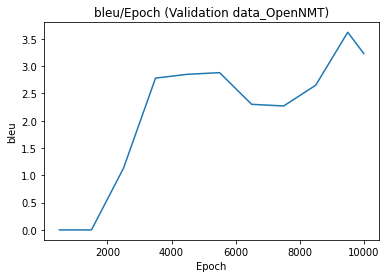

In [53]:
import seaborn
import matplotlib.pyplot as plt 
 
import pandas as pd 

df = pd.DataFrame()

df['Epoch'] = [500,1500,2500,3500,4500,5500,6500,7500,8500,9500,10000]
df['bleu'] = [0,0,1.13,2.78,2.85,2.88,2.30,2.27,2.65,3.62,3.23]
seaborn.lineplot(x="Epoch",
                    y="bleu",
                    data=df)
plt.title("bleu/Epoch (Validation data_OpenNMT)")